In [1]:
#Import the required the libraries
import numpy as np

import pandas as pd

import math

In [4]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

In [5]:
#Sequential class from Keras, which is a linear stack of layers.
from keras.models import Sequential
# Dense layer, which is a fully connected layer where each neuron in the layer is connected to every neuron in the previous layer.
from keras.layers import Dense, Activation
#LSTM is a type of recurrent neural network layer that is capable of learning long-term dependencies.
from keras.layers import LSTM

In [6]:
# This sets the seed for NumPy's random number generator to 7. 
# Any random numbers generated by NumPy after this call will follow the same sequence each time the code is run.
np.random.seed(7)

In [26]:
#exploring the dataset
apple=pd.read_csv("STOCK_APPLE.csv")

In [27]:
apple.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,12/12/1980,28.75,28.87,28.75,28.75,2093900,0.0,1,0.417880,0.419624,0.417880,0.417880,117258400
1,12/15/1980,27.38,27.38,27.25,27.25,785200,0.0,1,0.397967,0.397967,0.396078,0.396078,43971200
2,12/16/1980,25.37,25.37,25.25,25.25,472000,0.0,1,0.368752,0.368752,0.367008,0.367008,26432000
3,12/17/1980,25.87,26.00,25.87,25.87,385900,0.0,1,0.376019,0.377909,0.376019,0.376019,21610400
4,12/18/1980,26.63,26.75,26.63,26.63,327900,0.0,1,0.387066,0.388810,0.387066,0.387066,18362400


In [28]:
apple.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
9477,7/16/2018,191.52,192.65,190.415,190.91,15043110,0.0,1,191.52,192.65,190.415,190.91,15043110
9478,7/17/2018,189.75,191.87,189.200,191.45,15534523,0.0,1,189.75,191.87,189.200,191.45,15534523
9479,7/18/2018,191.78,191.80,189.930,190.40,16393381,0.0,1,191.78,191.80,189.930,190.40,16393381
9480,7/19/2018,189.69,192.55,189.690,191.88,20286752,0.0,1,189.69,192.55,189.690,191.88,20286752
9481,7/20/2018,191.78,192.43,190.170,191.44,20706042,0.0,1,191.78,192.43,190.170,191.44,20706042


In [29]:
apple.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,9482.000000,9482.000000,9482.000000,9482.000000,9.482000e+03,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000,9.482000e+03
mean,101.930695,103.166665,100.594377,101.893895,1.213254e+07,0.003811,1.000949,22.718782,22.931784,22.492652,22.717311,8.808592e+07
std,134.793358,135.912638,133.462139,134.713157,1.666834e+07,0.088671,0.064129,41.445668,41.775595,41.109029,41.451523,8.685437e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.161629,0.161629,0.159885,0.159885,2.503760e+05
25%,27.145000,27.620000,26.630000,27.102500,1.244350e+06,0.000000,1.000000,0.915779,0.934588,0.898277,0.916642,3.432188e+07
50%,44.000000,44.750000,43.365000,44.090500,3.877850e+06,0.000000,1.000000,1.432770,1.460627,1.404859,1.433053,6.012020e+07
75%,112.167500,113.750000,110.530000,112.295000,1.860560e+07,0.000000,1.000000,21.340044,21.657979,20.962715,21.369583,1.103266e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,194.140000,194.200000,192.360000,193.980000,1.855410e+09


In [30]:
apple.shape

(9482, 13)

In [31]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9482 entries, 0 to 9481
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9482 non-null   object 
 1   Open        9482 non-null   float64
 2   High        9482 non-null   float64
 3   Low         9482 non-null   float64
 4   Close       9482 non-null   float64
 5   Volume      9482 non-null   int64  
 6   Dividend    9482 non-null   float64
 7   Split       9482 non-null   int64  
 8   Adj_Open    9482 non-null   float64
 9   Adj_High    9482 non-null   float64
 10  Adj_Low     9482 non-null   float64
 11  Adj_Close   9482 non-null   float64
 12  Adj_Volume  9482 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 963.1+ KB


In [32]:
#change datatype of date
apple['Date']=pd.to_datetime(apple['Date'])

In [33]:
#range of dates
print(f"Dataframe contains date between{apple.Date.min()} and {apple.Date.max()}")
# F-strings are a way to embed expressions inside string literals, using curly braces {}.

Dataframe contains date between1980-12-12 00:00:00 and 2018-07-20 00:00:00


In [34]:
#total no of days
print(f"Total no of days is {(apple.Date.max()-apple.Date.min()).days}")

Total no of days is 13734


In [7]:
# IMPORTING DATASET 

dataset = pd.read_csv('STOCK_APPLE.csv', usecols=[1,2,3,4])

dataset = dataset.reindex(index = dataset.index[::-1])

In [8]:
# CREATING OWN INDEX FOR FLEXIBILITY

obs = np.arange(1, len(dataset) + 1, 1)

In [9]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION

OHLC_avg = dataset.mean(axis = 1)

HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)

close_val = dataset[['Close']]

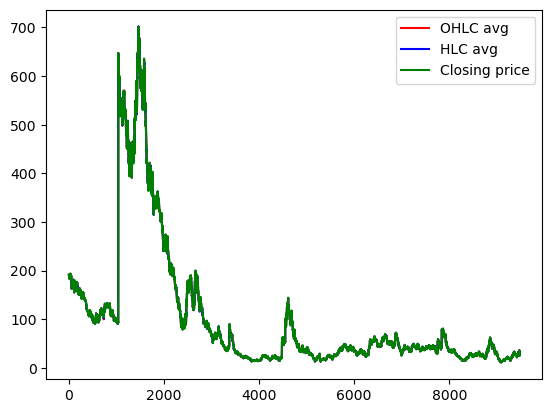

In [10]:
# PLOTTING ALL INDICATORS IN ONE PLOT

plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')

plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')

plt.plot(obs, close_val, 'g', label = 'Closing price')

plt.legend(loc = 'upper right')

plt.show()

In [11]:
# PREPARATION OF TIME SERIES DATASET

OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664

scaler = MinMaxScaler(feature_range=(0, 1))

OHLC_avg = scaler.fit_transform(OHLC_avg)


In [12]:
# TRAIN-TEST SPLIT

train_OHLC = int(len(OHLC_avg) * 0.75)

test_OHLC = len(OHLC_avg) - train_OHLC

train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [13]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET

def new_dataset(dataset, step_size):

	data_X, data_Y = [], []

	for i in range(len(dataset)-step_size-1):

		a = dataset[i:(i+step_size), 0]

		data_X.append(a)

		data_Y.append(dataset[i + step_size, 0])

	return np.array(data_X), np.array(data_Y)


In [14]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)

trainX, trainY = new_dataset(train_OHLC, 1)

testX, testY = new_dataset(test_OHLC, 1)


In [15]:
# RESHAPING TRAIN AND TEST DATA

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

step_size = 1

In [16]:
# LSTM MODEL

model = Sequential()

model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))

model.add(LSTM(16))

model.add(Dense(1))

model.add(Activation('linear'))

In [17]:
# MODEL COMPILING AND TRAINING

model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
7109/7109 - 42s - loss: 0.0017 - 42s/epoch - 6ms/step
Epoch 2/10
7109/7109 - 37s - loss: 1.6514e-04 - 37s/epoch - 5ms/step
Epoch 3/10
7109/7109 - 36s - loss: 1.6323e-04 - 36s/epoch - 5ms/step
Epoch 4/10
7109/7109 - 35s - loss: 1.5933e-04 - 35s/epoch - 5ms/step
Epoch 5/10
7109/7109 - 34s - loss: 1.5915e-04 - 34s/epoch - 5ms/step
Epoch 6/10
7109/7109 - 33s - loss: 1.5362e-04 - 33s/epoch - 5ms/step
Epoch 7/10
7109/7109 - 33s - loss: 1.5320e-04 - 33s/epoch - 5ms/step
Epoch 8/10
7109/7109 - 33s - loss: 1.5657e-04 - 33s/epoch - 5ms/step
Epoch 9/10
7109/7109 - 35s - loss: 1.4942e-04 - 35s/epoch - 5ms/step
Epoch 10/10
7109/7109 - 33s - loss: 1.5106e-04 - 33s/epoch - 5ms/step


In [18]:

# PREDICTION

trainPredict = model.predict(trainX)

testPredict = model.predict(testX)

75/75 [==============================] - 0s 3ms/step


In [19]:
# DE-NORMALIZING FOR PLOTTING

trainPredict = scaler.inverse_transform(trainPredict)

trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)

testY = scaler.inverse_transform([testY])

In [20]:
# TRAINING RMSE

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 7.40


In [21]:
# TEST RMSE

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Test RMSE: %.2f' % (testScore))


Test RMSE: 2.01


In [22]:

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS

trainPredictPlot = np.empty_like(OHLC_avg)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [23]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS

testPredictPlot = np.empty_like(OHLC_avg)

testPredictPlot[:, :] = np.nan

testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [24]:
# DE-NORMALIZING MAIN DATASET 

OHLC_avg = scaler.inverse_transform(OHLC_avg)

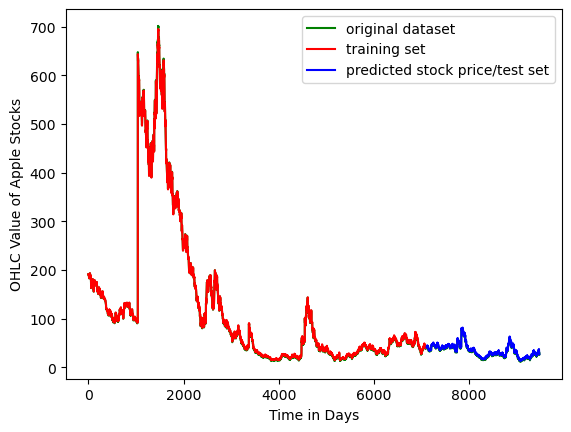

In [25]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS

plt.plot(OHLC_avg, 'g', label = 'original dataset')

plt.plot(trainPredictPlot, 'r', label = 'training set')

plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')

plt.legend(loc = 'upper right')

plt.xlabel('Time in Days')

plt.ylabel('OHLC Value of Apple Stocks')

plt.show()